### 1. Identify all GP practices located in London. For those practices, describe:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

In [ ]:
T1='https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV'
T2='https://files.digital.nhs.uk/20/09E30B/T201804ADDR%20BNFT.CSV'
T4='https://files.digital.nhs.uk/71/B59D99/gp-reg-pat-prac-all.csv'

In [3]:
T01=pd.read_csv(T1)

In [4]:
T01.columns

Index([' SHA', 'PCT', 'PRACTICE', 'BNF CODE',
       'BNF NAME                                    ', 'ITEMS  ',
       'NIC        ', 'ACT COST   ', 'QUANTITY', 'PERIOD',
       '                 '],
      dtype='object')

##### T01 has data 'SHA', 'PCT', 'PRACTICE', 'BNF_CODE', 'BNF_NAME', 'ITEMS', 'NIC','ACT_COST', 'QUANTITY', 'PERIOD'.

In [5]:
T01.columns = [
    'SHA', 
    'PCT', 
    'PRACTICE_CODE', 
    'BNF_CODE', 
    'BNF_NAME', 
    'ITEMS', 
    'NIC', 
    'ACT_COST',
    'QUANTITY',
    'PERIOD',
    ''
]

In [6]:
T02=pd.read_csv(T2)

##### T02 has no titles, need to be renamed for the further using. T02 has data of 'period', 'practice_code', 'practice_name', 'practice_organization', 'street', 'area', 'city', 'postcode'.

In [7]:
# 2. Create custom column names and read in the file again using the column names as the header.
cols = [
    'PERIOD', 
    'PRACTICE_CODE', 
    'PRACTICE_NAME', 
    'ORGANIZATION', 
    'STREET', 
    'AREA', 
    'CITY', 
    'POSTCODE'
]
T02 = pd.read_csv(T2, sep=',',header=None, names=cols,index_col=False)

In [10]:
T04 = pd.read_csv(T4)

T04.columns=['PUBLICATION', 'EXTRACT_DATE', 'TYPE', 'CCG_CODE', 'ONS_CCG_CODE',
       'PRACTICE_CODE', 'POSTCODE', 'SEX', 'AGE', 'NUMBER_OF_PATIENTS']


All the analysis and narrative were based on the GP practice Prescribing dataset (April 2018) with the aiming of assessing GP prescribing costs in different area. 

### 1.1 The total number of patients registered

##### T04 has data of 'PUBLICATION', 'EXTRACT_DATE', 'TYPE', 'CCG_CODE', 'ONS_CCG_CODE','CODE', 'POSTCODE', 'SEX', 'AGE', 'NUMBER_OF_PATIENTS'.

# London

In [11]:
practice_London_CCG = T04[(T04.CCG_CODE.str.startswith('08'))|(T04.CCG_CODE.str.strip()==('07L'))|(T04.CCG_CODE.str.strip()==('07M'))|(T04.CCG_CODE.str.strip()==('07N'))|(T04.CCG_CODE.str.strip()==('07O'))|(T04.CCG_CODE.str.strip()==('07P'))|(T04.CCG_CODE.str.strip()==('07Q'))|(T04.CCG_CODE.str.strip()==('07R'))|(T04.CCG_CODE.str.strip()==('07S'))|(T04.CCG_CODE.str.strip()==('07T'))|(T04.CCG_CODE.str.strip()==('07U'))|(T04.CCG_CODE.str.strip()==('07V'))|(T04.CCG_CODE.str.strip()==('07W'))|(T04.CCG_CODE.str.strip()==('07X'))|(T04.CCG_CODE.str.strip()==('07Y'))|(T04.CCG_CODE.str.strip()==('07Z'))|(T04.CCG_CODE.str.strip()==('09A'))]                 

In [12]:
number_of_patients_London = np.array(practice_London_CCG.NUMBER_OF_PATIENTS)
len(number_of_patients_London)

1323

In [13]:
sum(number_of_patients_London)

9851208

1.1 The total number of patients registered
After cleaning the databases. Firstly, Clinical Commissioning Groups (CCG) Names and Codes in England were used to identify all the GP practices in London. Through checking the CCG list renewed in April 2017. I found that codes from 07L to 09A represented the practicing location as London. Then, by identifying and using the practice codes in CCG, I can further find other information related to all GP practices located in London. The practice codes were used as ‘key’ to identify matched column of ‘number of patients’. There were 1323 practices codes. After the above operation, results showed that the total number of patients registered in London was 9851208. 


In [14]:
PRACTICE_CODE_London_array=np.array(practice_London_CCG.PRACTICE_CODE)

In [15]:
practicenumber_London=T01.loc[T01['PRACTICE_CODE'].isin(PRACTICE_CODE_London_array)]

In [16]:
QUANTITY_London_array=np.array(practicenumber_London.QUANTITY)
sum(QUANTITY_London_array), np.mean(QUANTITY_London_array)

(890389995, 635.3801655546438)

1.2 The total number of prescriptions
Next, the key (practice code) was used to further identify the amount of prescriptions in London by another dataset. The total prescriptions in London was 890389995 in April 2018.


In [17]:
COST_London_array=np.array(practicenumber_London.ACT_COST)
sum(COST_London_array),np.mean(COST_London_array)

(76586738.71000625, 54.652113112355956)

1.3 The total actual cost of these prescriptions 
Then, results showed that the total actual cost of prescriptions among GP practices located in London was 76586738.7 pounds, by using the ACT COST column. 


In [18]:
London_sorted = practicenumber_London.sort_values('QUANTITY', axis=0, ascending=False)
London_top10 = London_sorted.head(10)
London_top10

,SHA,PCT,PRACTICE_CODE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
7395174,Q63,08X,H85001,090402000BBTXA0,Nutrison_800 Complete M/Fibre Liq,71,10829.00,10043.60,980000,201804,
7395159,Q63,08X,H85001,090402000BBPGA0,Nutrison_1000 Complete M/Fibre Liq,33,5414.64,5021.90,462000,201804,
7301482,Q63,08Q,G85034,090402000BBAJA0,Fortisip Bottle_Liq (8 Flav),92,2432.64,2257.17,434400,201804,
7052336,Q63,07V,H83013,090402000BBLMA0,Nutrison Pack_Energy M/Fibre,13,5076.96,4708.49,320144,201804,
6274298,Q61,08D,F85067,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),31,1752.80,1625.91,313000,201804,
6380881,Q61,08M,F84004,090402000BBRMA0,Fresubin 2kcal_Drink (6 Flav),33,2982.00,2765.90,284000,201804,
6791226,Q62,08E,E84009,090402000BBNVA0,Jevity Promote_Liq,10,2980.56,2764.27,264000,201804,
6173413,Q61,07T,F84096,090402000BBRMA0,Fresubin 2kcal_Drink (6 Flav),44,2763.60,2563.47,263200,201804,
6124021,Q61,07R,F83017,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),94,1314.88,1220.56,234800,201804,
7395154,Q63,08X,H85001,090402000BBLMA0,Nutrison Pack_Energy M/Fibre,17,2947.84,2734.01,231000,201804,


1.4 The top 10 most frequent drugs prescribed
The top 10 most frequent drugs prescribed in London were listed in the above Table, which included “Nutrison_800 Complete M/Fibre Liq”, “Nutrison_1000 Complete M/Fibre Liq”, “Fortisip Bottle_Liq (8 Flav)” and so on. The top 10 frequent drugs prescription amounts ranged between 980000 to 231000.


In [19]:
London_sorted = practicenumber_London.sort_values('QUANTITY', axis=0, ascending=True)
London_bottom10 = London_sorted.head(10)
London_bottom10

,SHA,PCT,PRACTICE_CODE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
6281693,Q61,08D,F85669,090401000BBJGA0,Calogen_Emuls (Sbery),1,2305.00,2137.65,0,201804,
6017696,Q61,07L,F82017,0801030P0AAFEFE,Methotrexate_Inj 20mg/0.8ml Pfs,8,128.48,119.25,0,201804,
7088769,Q63,07V,H83611,0801030P0AAFIFI,Methotrexate_Inj 7.5mg/0.3ml Pfs,1,13.37,12.41,0,201804,
6079239,Q61,07M,E83030,1308010Z0BBABAB,Picato_Gel 500mcg/g,1,65.00,60.29,0,201804,
6023373,Q61,07L,F82038,1308010Z0BBABAB,Picato_Gel 500mcg/g,1,65.00,60.29,0,201804,
7280819,Q63,08P,H84044,0803042K0AAAAAA,Goserelin Acet_Implant 3.6mg Pfs,1,65.00,60.29,1,201804,
6910354,Q62,08Y,E87762,23802098000,H & R_Proshield Foam & Spy Skin Cleanser,1,6.61,6.14,1,201804,
6277736,Q61,08D,F85623,0206010F0BFABCJ,Nitrolingual_P/Spy 400mcg (200 D),1,3.44,3.20,1,201804,
7304602,Q63,08Q,G85042,21120000130,Clement Clarke Stnd Range Peak Flow Mete,1,7.08,6.58,1,201804,
6928461,Q62,09A,E87052,21300000113,Hylo-Fresh Sod Hyaluronate Eye Dps P/F 1,1,4.95,4.60,1,201804,


1.5 The bottom 10 less frequent drugs prescribed 
The bottom 10 less frequent drugs prescribed in London were also listed in table, which including “Calogen_Emuls (Sbery)”, “Methotrexate_Inj 7.5mg/0.3ml Pfs”, “Picato_Gel 500mcg/g” and so on. These bottom 10 less frequent prescribed drugs were normally being used only once or not been prescribed.


# Cambridge

In [20]:
practice_Cambridge_CCG = T04[T04.CCG_CODE.str.strip()==('06H')]
len(practice_Cambridge_CCG)

102

In [21]:
practice_06H=np.array(practice_Cambridge_CCG.PRACTICE_CODE)

In [22]:
practice_Cambridge = T02[(T02.CITY.str.contains('CAMBRIDGE'))|(T02.AREA.str.contains('CAMBRIDGE'))]
len(practice_Cambridge)

127

In [23]:
practice_Cambridge = practice_Cambridge.loc[practice_Cambridge['PRACTICE_CODE'].isin(practice_06H)]
len(practice_Cambridge)

94

2.1
After knowing information about the GP practices in London. Similarly, we further identified the above items for the city of Cambridge. But, under the consideration of that there was no specific CCG codes for practice located in Cambridge. So, ‘city’ and ‘area’ were used firstly to identify all practices in Cambridge, where we got 96 practice codes in the city of Cambridge. In order to improve the accuracy, the CCG codes for Cambridgeshire and Peterborough PCT Cluster were used as well to further identify all the practices in Cambridge. Then, we excluded the uncertainty data, and finally, there was 94 practices codes in the city of Cambridge. 


In [24]:
practice_array=practice_Cambridge.PRACTICE_CODE

In [25]:
patient_Cambridge = T04.loc[T04['PRACTICE_CODE'].isin(practice_array)]

In [26]:
patient_Cambridge_array=np.array(patient_Cambridge.NUMBER_OF_PATIENTS)

In [27]:
sum(patient_Cambridge_array)

897437

In [28]:
_Cambridge = T01.loc[T01['PRACTICE_CODE'].isin(practice_array)]
sum(_Cambridge.QUANTITY), np.mean(_Cambridge.QUANTITY)

(90268737, 690.8092614275547)

In [29]:
practice_Cambridge_COST=np.array(_Cambridge.ACT_COST)
sum(practice_Cambridge_COST),np.mean(practice_Cambridge_COST)

(8521724.439999988, 65.21511613135279)

In [30]:
cambridge_sorted = _Cambridge.sort_values('QUANTITY', axis=0, ascending=False)
cambridge_sorted_top10 = cambridge_sorted.head(10)
cambridge_sorted_top10

,SHA,PCT,PRACTICE_CODE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
4223246,Q56,06H,D81026,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),96,2988.45,2775.37,257625,201804,
4250344,Q56,06H,D81044,090402000BBGYA0,Nutrison Pack_Energy,6,2229.36,2067.57,159072,201804,
4213128,Q56,06H,D81020,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),26,1821.20,1689.80,157000,201804,
4193506,Q56,06H,D81008,0407010H0AAAMAM,Paracet_Tab 500mg,1048,1370.31,1310.25,134303,201804,
4192163,Q56,06H,D81007,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),28,1542.80,1431.13,133000,201804,
4286142,Q56,06H,D81082,090402000BBLMA0,Nutrison Pack_Energy M/Fibre,6,2717.15,2519.93,127608,201804,
4248146,Q56,06H,D81043,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),27,1439.85,1335.64,124125,201804,
4228416,Q56,06H,D81029,090402000BBSIA0,Fortisip Compact_Liq (8 Flav),29,1386.20,1286.28,119500,201804,
4223251,Q56,06H,D81026,090402000BBUBA0,Fortisip Compact Protein_Liq (8 Flav),17,1824.00,1691.78,114000,201804,
4223250,Q56,06H,D81026,090402000BBTXA0,Nutrison_800 Complete M/Fibre Liq,4,1237.60,1147.79,112000,201804,


In [31]:
cambridge_sorted = _Cambridge.sort_values('QUANTITY', axis=0, ascending=True)
cambridge_sorted_bottom10 = cambridge_sorted.head(10)
cambridge_sorted_bottom10

,SHA,PCT,PRACTICE_CODE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
4240709,Q56,06H,D81037,1308010Z0AAAAAA,Ingenol Mebutate_Gel 150mcg/g,1,21.67,20.21,0,201804,
4269129,Q56,06H,D81058,1308010Z0BBABAB,Picato_Gel 500mcg/g,1,65.00,60.28,0,201804,
4237098,Q56,06H,D81034,21300000704,Xailin Carbomer Eye Gel 10g,1,3.28,3.05,1,201804,
4270671,Q56,06H,D81059,21010230144,Space Chamber Plus Compact,1,4.26,3.95,1,201804,
4200627,Q56,06H,D81012,0402020ABBBAAAA,Xeplion_Inj 50mg/0.5ml Pfs,1,183.92,170.58,1,201804,
4200628,Q56,06H,D81012,0402020ADAAAAAA,Aripiprazole_Inj 400mg Vl + Dil,1,220.41,204.43,1,201804,
4200630,Q56,06H,D81012,0402020G0BBAAAA,Depixol_Inj 20mg/ml 1ml Amp,1,1.52,1.52,1,201804,
4322382,Q56,06H,Y00056,0301020Q0BBACAC,Spiriva Respimat_Inha 2.5mcg (60D) + Dev,1,23.00,21.34,1,201804,
4322381,Q56,06H,Y00056,0301020I0AAANAN,Ipratrop Brom_Inha 20mcg (200 D) CFF,1,5.56,5.17,1,201804,
4322379,Q56,06H,Y00056,0301011R0AABUBU,Salbutamol_Inha B/A 100mcg (200 D) CFF,1,6.30,5.85,1,201804,


2.1 For those practices in Cambridge, totally there was 897437 patients registered. The total amount of prescriptions was 90268737. Then, by using the ACT COST column, results showed that the total actual cost of these prescriptions was 8521724.4 pounds. As for the top 10 most frequent drugs prescribed in Cambridge, which including “Fortisip Compact_Liq (8 Flav)”, “Nutrison Pack_Energy”, “Paracet_Tab 500mg” and so on. The top 10 frequent drugs prescription amounts ranged between 257625 to 112000 in Cambridge. And the bottom 10 less frequent drugs prescribed in Cambridge included “Ingenol Mebutate_Gel 150mcg/g”, “Picato_Gel 500mcg/g”, “Xailin Carbomer Eye Gel 10g” and so on. These bottom 10 less frequent prescribed drugs were normally being used only once or not been prescribe, which was similar with the situation in London.

2.2
After understanding the basic situations of patients registered and GP prescriptions in the two cities, we further compared the findings between the two cities. Comparing with London, patients registered and practices amounts were less than that in Cambridge, which was (9851208 patients vs 897437 patients) and (1323 practices codes vs 94 practices codes), respectively. In April 2018, the total prescriptions in London was 890389995 and the corresponding actual cost of these prescriptions was 76586738.7 pounds, which were higher than the 90268737 prescriptions and their corresponding cost of prescriptions 8521724.4 pounds in Cambridge. But, the average prescriptions in London was 635.4 times, which was less than the average prescriptions in Cambridge (690.8 times). As for the average cost of these prescriptions, the average cost was also lower in London (54.7 pounds) compared with that in Cambridge (65.2 pounds). The average prescriptions and their corresponding average cost were both lower in London in April 2018. 


### 3. Describe total number of prescriptions and their total actual cost (using the ACT COST column) across all practices for drugs related to:

### 3.1. cardiovascular disease (British National Formulary chapter 2)

In [32]:
Cardiovascular = T01.loc[T01['BNF_CODE'].str.startswith('020')]
Cardiovascular.head()

,SHA,PCT,PRACTICE_CODE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804,
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804,
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804,
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804,
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804,


In [33]:
Cardiovascular_QUANTITY=np.array(Cardiovascular.QUANTITY)

In [34]:
sum(Cardiovascular_QUANTITY)

732241267

In [35]:
Cardiovascular_COST=np.array(Cardiovascular.ACT_COST)

In [36]:
sum(Cardiovascular_COST)

77465225.95001376

### 3.2. antidepressants (British National Formulary chapter 4.3)

In [37]:
Antidepressant = T01.loc[T01['BNF_CODE'].str.startswith('04030')]
sum(Antidepressant.QUANTITY),sum(Antidepressant.ACT_COST)

(214223401, 16853470.85999925)

3. BNF code was used to identify drugs prescribed which related to cardiovascular disease (British National Formulary chapter 2) and antidepressants (British National Formulary chapter 4.3). We found that BNF code which started with 020 represented drugs for cardiovascular disease. The result showed that the total number of prescriptions for cardiovascular disease was 732241267, and their corresponding total actual cost was 77565226.0 pounds. For drugs related to antidepressants, there was 214223401 prescriptions in total, which corresponded 16853470.9 pounds total actual cost of prescriptions.

### 4. Describe the total spending and the relative costs per patient across all practices for the month of April 2018:

In [38]:
PATIENT = pd.DataFrame(T04.groupby(T04.PRACTICE_CODE).apply(lambda subf: subf['NUMBER_OF_PATIENTS'].sum()))
PATIENT.columns = ['NUMBER_OF_PATIENTS']
PATIENT.reset_index(inplace=True)

In [39]:
COST = pd.DataFrame(T01.groupby(T01.PRACTICE_CODE).apply(lambda subf: subf['ACT_COST'].sum()))
COST.columns = ['ACT_COST']
COST.reset_index(inplace=True)

In [40]:
QUANTITY = pd.DataFrame(T01.groupby(T01.PRACTICE_CODE).apply(lambda subf: subf['QUANTITY'].sum()))
QUANTITY.columns = ['QUANTITY']
QUANTITY.reset_index(inplace=True)

In [41]:
merged = pd.merge(COST, QUANTITY [['PRACTICE_CODE', 'QUANTITY']], left_on='PRACTICE_CODE' , right_on='PRACTICE_CODE')

In [42]:
merged = pd.merge(merged, PATIENT [['PRACTICE_CODE', 'NUMBER_OF_PATIENTS']], left_on='PRACTICE_CODE' , right_on='PRACTICE_CODE')

In [43]:
merged['COSTS_PER_PATIENT'] = merged['ACT_COST'] / merged['NUMBER_OF_PATIENTS']
merged.head()

,PRACTICE_CODE,ACT_COST,QUANTITY,NUMBER_OF_PATIENTS,COSTS_PER_PATIENT
0,A81001,52194.63,668445,4086,12.774016
1,A81002,268607.26,2831262,19906,13.493784
2,A81004,139115.40,1533857,10165,13.685726
3,A81005,102914.06,974372,8016,12.838580
4,A81006,183226.79,1949738,14497,12.638945


### 4.1 visualize the monthly total spending per registered patients using a scatterplot and provide a trend line

(0, 10461532)

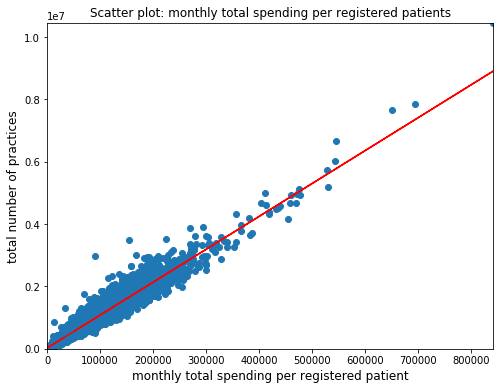

In [44]:
import matplotlib.pyplot as plt
from math import floor
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x = merged['ACT_COST']
y = merged['QUANTITY']
ax.scatter(x, y)
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending per registered patients')
ax.set_xlabel("monthly total spending per registered patient",fontsize=12)
ax.set_ylabel("total number of practices",fontsize=12)
max_x = floor(merged.ACT_COST.max())
max_y = floor(merged.QUANTITY.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

4.1 The total spending and the relative costs per patient across all practices in April 2018
The X axis of the above scatterplot was the monthly total spending per registered patients and the Y axis represented the number of prescriptions. As shown in the scatterplot, there was a nearly linear correlation between the total spending and the number of prescriptions across all practices in April 2018. 


### 4.2 generate a histogram for relative spending for all practices and fit a Gaussian (normal) curve

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


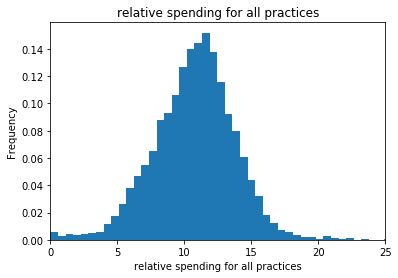

In [45]:
from scipy.stats import norm

data=merged.COSTS_PER_PATIENT.values

plt.hist(data, bins=5000,normed=True)
plt.xlabel("relative spending for all practices")
plt.ylabel("Frequency")

min_x = merged['COSTS_PER_PATIENT'].quantile(.01)
max_x = merged['COSTS_PER_PATIENT'].quantile(.99)
plt.xlim(0, 25)

plt.title("relative spending for all practices")
plt.show()

In [46]:
np.mean(data),np.std(data)

(11.60649702182044, 38.8662432619554)

4.2 Then, in order to further understanding the relationship between the relative costs per patient and the relative costs per patient across all practices in April 2018. A histogram was generated for relative spending for all practices and fit a Gaussian (normal) curve, where we can find that there was a nearly normal distribution. The mean cost of per patient across all practices was 11. 6 pounds (SD=38.9) in April 2018.